# Tech Challenge | Fase 2 | pós IA para DEVs

## Silvio Sales do Nascimento Junior (RM 353303)

**Segue link contendo vídeo explicando o trabalho: [https://youtu.be/q_EVIa-qciA](https://youtu.be/q_EVIa-qciA)**

**Importações necessárias**

In [17]:
import pygame
from pygame.locals import *
import random
import itertools
from algoritmos_geneticos import *
from draw_functions import *
import sys
import numpy as np
import pygame
from benchmark_att48 import *

**Setando valores para o Pygame**

In [18]:
WIDTH, HEIGHT = 800, 400
NODE_RADIUS = 10
FPS = 30
PLOT_X_OFFSET = 450

**Setando valores para o GA (algoritmos_geneticos.py)**

In [19]:
N_PONTOS_ONIBUS = 15
POPULATION_SIZE = 200
N_GENERATIONS = None
MUTATION_PROBABILITY = 0.5

**Setando cores para os gráficos do PyGame**

In [20]:
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)

### **Iniciando o problema**

Melhor rota para um ônibus escolar percorrer os pontos:

* O ônibus deve percorrer TODOS os pontos que embarcam estudantes.
* Só deve passar UMA ÚNICA VEZ pelo ponto.
* Deve fazer o percurso MAIS RÁPIDO POSSÍVEL.

**Geração aleatória dos pontos de acordo com o tamanho do cenário no Pygame e com a quantidade definida para GA.**

In [21]:
pontos_onibus_locations = [(random.randint(NODE_RADIUS + PLOT_X_OFFSET, WIDTH - NODE_RADIUS), random.randint(NODE_RADIUS, HEIGHT - NODE_RADIUS))
                    for _ in range(N_PONTOS_ONIBUS)]

**Para fixar/padronizar os pontos de ônibus sempre que rodar**

In [22]:
 # WIDTH, HEIGHT = 800, 400
 # pontos_onibus_locations = default_problems[15]

**Controles de inicialização do Pygame**

In [23]:
pygame.init()
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Problema das paradas de ônibus")
clock = pygame.time.Clock()
generation_counter = itertools.count(start=1)  # Start the counter at 1

**Inicializamos a população com valores aleatórios**

In [24]:
population = generate_random_population(pontos_onibus_locations, POPULATION_SIZE)
best_fitness_values = []
best_solutions = []

**Fluxo principal do algoritmo, contendo as condições de término**

In [25]:

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_q:
                running = False

    # contador das gerações
    generation = next(generation_counter)

    screen.fill(WHITE)

    # cálculo do Fitness (quão perto está de atingir o objetivo)     
    population_fitness = [calculate_fitness(
        individual) for individual in population]

    # ordenação dos indivíduos pelo valor do fitness
    population, population_fitness = sort_population(
        population,  population_fitness)

    # salvamos os melhores indivíduso da população
    best_fitness = calculate_fitness(population[0])
    best_solution = population[0]

    best_fitness_values.append(best_fitness)
    best_solutions.append(best_solution)

    # plotamos todos os desenhos na tela
    draw_plot(screen, list(range(len(best_fitness_values))),
              best_fitness_values, y_label="Fitness - Distance (pxls)")

    draw_pontos_onibus(screen, pontos_onibus_locations, YELLOW, NODE_RADIUS)
    draw_paths(screen, best_solution, BLUE, width=3)
    draw_paths(screen, population[1], rgb_color=(128, 128, 128), width=1)

    print(f"Generation {generation}: Best fitness = {round(best_fitness, 2)}")

    # fazemos a substituição da população atual para a nova população 
    # Salvamos o melhor individuo da população (Elitismo) para preservar ao longo da população gerada nas gerações.
    new_population = [population[0]]

    # entramos em um looping, vamos permanecer nele até que geramos indivíduos suficiente para completar o tamanho da população (POPULATION_SIZE).
    while len(new_population) < POPULATION_SIZE:

        # método de seleção é o da probabilidade em função do tamanho
        # quanto menor a distância do trajeto maior a chances do individuo ser sorteado
        probability = 1 / np.array(population_fitness)
        parent1, parent2 = random.choices(population, weights=probability, k=2)

        # MÉTODO DE SELEÇÃO DE TORNEIO
        # seleção simples baseada nas 10 melhores soluções
        # parent1, parent2 = random.choices(population[:10], k=2)     

        # fazemos o cruzamento, utilizando order_crossover
        child1 = order_crossover(parent1, parent1)

        # mutação de swap simples
        child1 = mutate(child1, MUTATION_PROBABILITY)

        # adicionamos o nome indivíduo a população
        new_population.append(child1)

    # substituímos população pela nova população
    population = new_population

    pygame.display.flip()
    clock.tick(FPS)




Generation 1: Best fitness = 2205.91
Generation 2: Best fitness = 2205.91
Generation 3: Best fitness = 2205.91
Generation 4: Best fitness = 2205.91
Generation 5: Best fitness = 2205.91
Generation 6: Best fitness = 2064.04
Generation 7: Best fitness = 2009.39
Generation 8: Best fitness = 1973.18
Generation 9: Best fitness = 1973.18
Generation 10: Best fitness = 1973.18
Generation 11: Best fitness = 1973.18
Generation 12: Best fitness = 1934.83
Generation 13: Best fitness = 1903.77
Generation 14: Best fitness = 1903.77
Generation 15: Best fitness = 1903.77
Generation 16: Best fitness = 1903.77
Generation 17: Best fitness = 1903.77
Generation 18: Best fitness = 1903.77
Generation 19: Best fitness = 1858.41
Generation 20: Best fitness = 1858.41
Generation 21: Best fitness = 1858.41
Generation 22: Best fitness = 1858.41
Generation 23: Best fitness = 1858.32
Generation 24: Best fitness = 1858.32
Generation 25: Best fitness = 1858.32
Generation 26: Best fitness = 1858.32
Generation 27: Best f

**Encerrando**

pygame.quit()
sys.exit()

# Conclusão

**Na Geração 100 ele chega a um best fitness estabilizado de 1256 pixel de distância percorrido.**

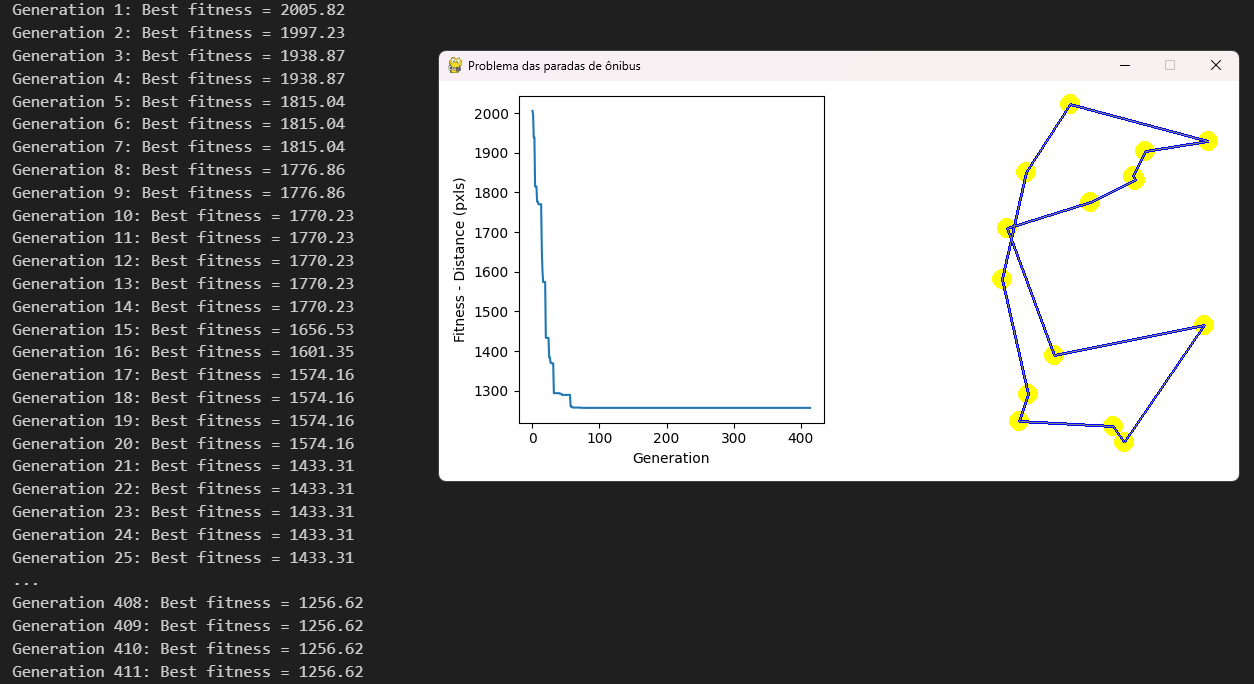

**Quando estabilizamos o sorteio dos pontos de ônibus é realmente possível observar que**
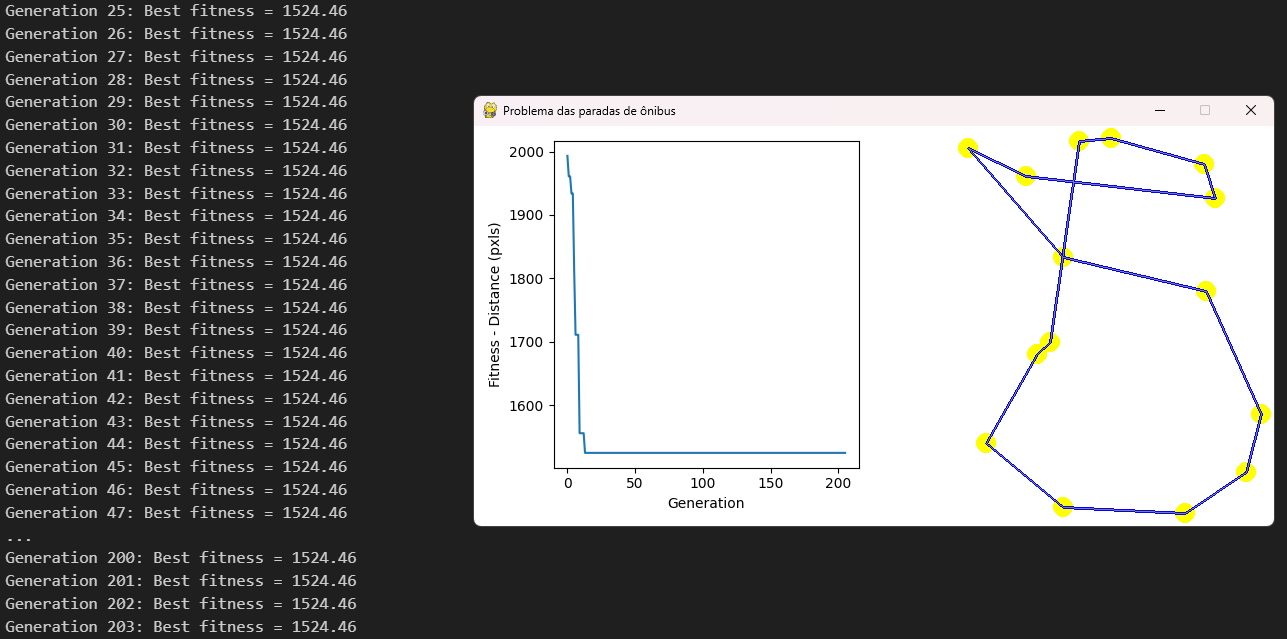